In [1]:
import os
import sys
import pickle

import numpy as np

import scipy.optimize

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

main_dir = "/home/axel/BdG-numerical"
if not main_dir in sys.path:
    sys.path.append(main_dir)

if not os.getcwd() == main_dir:
    os.chdir(main_dir)


In [2]:
print(os.getcwd())

/home/axel/BdG-numerical


In [4]:
def get_pickle_paths(dir):
    # collect pickle paths
    paths = []
    for fp in os.listdir(dir):
        if fp.endswith(".pickle"):
            print("path added: " + dir + fp)
            paths.append(dir + fp)
    return paths

# define dir
run_date = "230916/"
run_name = "run1/"

hom_path = "cluster_runs/" + run_date + run_name + "hom/"
inhom_path = "cluster_runs/" + run_date + run_name + "inhom/"

# get paths
hom_pickles_paths = get_pickle_paths(hom_path)
inhom_pickles_paths = get_pickle_paths(inhom_path)

path added: cluster_runs/230916/run1/hom/135787713-deltas.pickle
path added: cluster_runs/230916/run1/inhom/135787703-deltas.pickle
path added: cluster_runs/230916/run1/inhom/135787709-deltas.pickle
path added: cluster_runs/230916/run1/inhom/135787699-deltas.pickle
path added: cluster_runs/230916/run1/inhom/135787701-deltas.pickle
path added: cluster_runs/230916/run1/inhom/135787705-deltas.pickle
path added: cluster_runs/230916/run1/inhom/135787711-deltas.pickle
path added: cluster_runs/230916/run1/inhom/135787707-deltas.pickle


In [5]:
delta_lists = {}
keys = []

# load inhoms
for i, fp in enumerate(inhom_pickles_paths):
    with open(fp, "rb") as f:
        key = "delta-inhom-freq-" + str(i+1)
        delta_lists[key] = pickle.load(f)
        keys.append(key)
        for i in range(len(delta_lists[key])):
            delta_lists[key][i] = np.abs(delta_lists[key][i])

# load hom
for i, fp in enumerate(hom_pickles_paths):
    with open(fp, "rb") as f:
        key = "delta-hom-" + str(i+1)
        delta_lists[key] = pickle.load(f)
        keys.append(key)
        for i in range(len(delta_lists[key])):
            delta_lists[key][i] = np.abs(delta_lists[key][i])

print(keys)

arr1 = delta_lists[keys[-1]]
arr2 = delta_lists[keys[2]]

print(np.array(arr1) - np.array(arr2))


['delta-inhom-freq-1', 'delta-inhom-freq-2', 'delta-inhom-freq-3', 'delta-inhom-freq-4', 'delta-inhom-freq-5', 'delta-inhom-freq-6', 'delta-inhom-freq-7', 'delta-hom-1']
[[-0.00044435  0.00042856  0.00057805 ... -0.00055367 -0.00042272
   0.00044489]
 [-0.00097078 -0.00159383 -0.00301957 ...  0.00317293  0.00165093
   0.00098264]
 [-0.00049293  0.000337    0.00040835 ... -0.00060087 -0.00044942
   0.00042874]
 ...
 [-0.00044423  0.00043154  0.00058359 ... -0.00056511 -0.00043029
   0.00044155]
 [-0.0004431   0.00042957  0.00057894 ... -0.00055277 -0.00042224
   0.0004459 ]
 [-0.00044477  0.00042707  0.00057554 ... -0.00055301 -0.00042266
   0.00044489]]


In [6]:
def delta_norm(delta_list):
    norm = 0
    for delta in delta_list:
        norm += abs(delta)**2
    
    return np.sqrt(norm)

delta_ordinary_norms = {}

for key, val in delta_lists.items():
    delta_ordinary_norms[key] = delta_norm(delta_lists[key][0])

num_methods = len(delta_lists[keys[0]]) - 1

norms  = {}
errs = {}

for key, delta_list in delta_lists.items():
    norm_list = []
    err_list = []
    
    for i in range(num_methods-1):
        norm_list.append(1-delta_norm(delta_lists[key][0] - delta_lists[key][i+1])/delta_ordinary_norms[key])
        err_list.append(1 - np.array(norm_list[-1]))
    print(norm_list)
    norms[key] = norm_list
    errs[key] = err_list

[0.879702034098981, 0.9579498766174259, 0.9862478126936655, 0.9941756623611838, 0.9980289477757127, 0.9993546714646226, 0.999831439241717, 0.9999566204208089, 0.9999839873764254]
[0.8828188089735777, 0.960285569745769, 0.987285442616059, 0.994834001474147, 0.9985801822694397, 0.9996809130197793, 0.9999076577971241, 0.9999466728394123, 0.9999788761906256]
[0.8793116109425476, 0.9576015980985624, 0.9860891027457644, 0.9940535700981522, 0.997924845470537, 0.9992810964219971, 0.9997813278772726, 0.9999302165832782, 0.9999745158130869]
[0.87936060504062, 0.9576460940702182, 0.986109290402645, 0.9940696580022755, 0.9979384982418453, 0.9992910596979475, 0.9997881857269629, 0.9999341164799297, 0.9999764585365896]
[0.8800885828992073, 0.9582810507519856, 0.9863984550926342, 0.9942848533668196, 0.9981211133646799, 0.9994171285194038, 0.9998713450251854, 0.999971826034055, 0.9999841741401236]
[0.8884662405155619, 0.9628785293374014, 0.9883248060019298, 0.9955307857797759, 0.999042439223471, 0.999

delta-inhom-freq-1
9
9
delta-inhom-freq-2
9
9
delta-inhom-freq-3
9
9
delta-inhom-freq-4
9
9
delta-inhom-freq-5
9
9
delta-inhom-freq-6
9
9
delta-inhom-freq-7
9
9
delta-hom-1
9
9


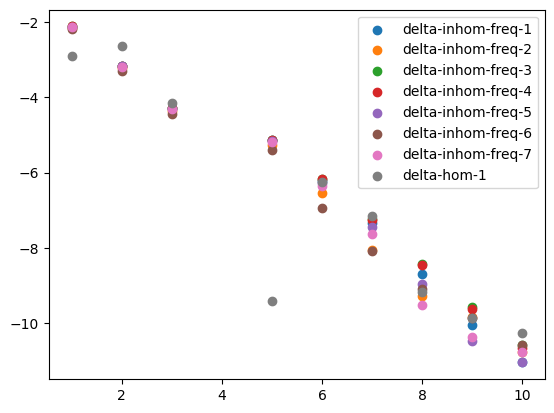

In [7]:
Nc_list = [1, 2, 3, 5, 6, 7, 8, 9, 10]


# fit_result = np.polyfit(Nc_list[start_i:], np.log(err[start_i:]), 1, w=np.sqrt(err[start_i:]))
#hom_fit_result, pcov = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t), Nc_list[start_i:end_i], hom_err[start_i:end_i], p0=(0.1, 0.1))
#inhom_fit_result, pcov = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t), Nc_list[start_i:end_i], inhom_err[start_i:end_i], p0=(0.1, 0.1))

#hom_A = hom_fit_result[0]
#hom_B = hom_fit_result[1]

#inhom_A = inhom_fit_result[0]
#inhom_B = inhom_fit_result[1]


x_range = np.array(Nc_list)




for key, err_list in errs.items():
    print(key)
    print(len(err_list))
    print(len(Nc_list))
    
    plt.scatter(Nc_list, np.log(err_list),label=key)
    #plt.scatter(Nc_list[start_i:end_i], np.log(inhom_err[start_i:end_i]),label="Inom")



plt.legend()

